Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Dataset and converting it to a Pandas Dataframe

In [ ]:
df = pd.read_csv('Accidental_Drug_Related_Deaths_2012-2021.csv')
df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [ ]:
df.shape

(9202, 48)

Printing the number of null/empty cells in each column/attribute

In [ ]:
df.isnull().sum()

Date                                0
Date Type                           0
Age                                 2
Sex                                 8
Race                               24
Ethnicity                        7915
Residence City                    389
Residence County                 1042
Residence State                  1776
Injury City                       178
Injury County                    3288
Injury State                     2912
Injury Place                      102
Description of Injury             791
Death City                          5
Death County                     1112
Death State                      2329
Location                           22
Location if Other                8363
Cause of Death                      0
Manner of Death                     9
Other Significant Conditions     8387
Heroin                           5855
Heroin death certificate (DC)    8462
Cocaine                          6031
Fentanyl                         3530
Fentanyl Ana

Printing the data types of values stored in each column

In [ ]:
df.dtypes

Date                              object
Date Type                         object
Age                              float64
Sex                               object
Race                              object
Ethnicity                         object
Residence City                    object
Residence County                  object
Residence State                   object
Injury City                       object
Injury County                     object
Injury State                      object
Injury Place                      object
Description of Injury             object
Death City                        object
Death County                      object
Death State                       object
Location                          object
Location if Other                 object
Cause of Death                    object
Manner of Death                   object
Other Significant Conditions      object
Heroin                            object
Heroin death certificate (DC)     object
Cocaine         

Converting data to a format that is process-able by Pandas

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

As 'ResidenceCityGeo'had the name of the State as well as the coordinates, we split the two and then add them as seperate columns in our DataFrame. We do the same with 'InjuryCity' and 'DeathCity'.

In [ ]:
df['RCG']=df['ResidenceCityGeo'].str.split(',').str[0]

In [ ]:
df[['Residence City','RCG']].loc[(df['Residence City']!=df['RCG']) & (df['Residence City'].notnull()) & (df['RCG'].notnull())].sum()

Residence City    0.0
RCG               0.0
dtype: float64

In [ ]:
df['ICG']=df['InjuryCityGeo'].str.split(',').str[0]
df['Injury City']=df['Injury City'].str.split(',').str[0]

In [ ]:
df[['Injury City','ICG']].loc[(df['Injury City']!=df['ICG']) & (df['Injury City'].notnull()) & (df['ICG'].notnull())].sum()

Injury City    0.0
ICG            0.0
dtype: float64

In [ ]:
df['DCG']=df['DeathCityGeo'].str.split(',').str[0]
df['DCG']=df['DCG'].str.upper()

In [ ]:
df[['Death City','DCG']].loc[(df['Death City']!=df['DCG']) & (df['Death City'].notnull()) & (df['DCG'].notnull())].sum()

Death City    0.0
DCG           0.0
dtype: float64

In [ ]:
df['ResidenceCityGeo']=df['ResidenceCityGeo'].str.split('\n').str[1]
df['InjuryCityGeo']=df['InjuryCityGeo'].str.split('\n').str[1]
df['DeathCityGeo']=df['DeathCityGeo'].str.split('\n').str[1]

Updated DataFrame

In [ ]:
df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo,RCG,ICG,DCG
0,2012-05-29,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,"(41.051924, -73.539475)","(41.051924, -73.539475)","(41.575155, -72.738288)",STAMFORD,STAMFORD,CT\n(41.575155
1,2012-06-27,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,"(41.524304, -72.075821)","(41.524304, -72.075821)","(41.524304, -72.075821)",NORWICH,NORWICH,NORWICH
2,2014-03-24,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)","(41.658069, -72.366324)","(41.632043, -72.461309)",HEBRON,HEBRON,MARLBOROUGH
3,2014-12-31,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"(41.617221, -72.085031)","(41.575155, -72.738288)","(41.617221, -72.085031)",BALTIC,CT\n(41.575155,BALTIC
4,2016-01-16,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,Y,NaN,"(41.316843, -73.092968)","(41.316843, -73.092968)","(41.179195, -73.189476)",SHELTON,SHELTON,BRIDGEPORT


We drop these columns as we do not need them anymore due to the aforementioned splitting.

In [ ]:
df=df.drop(['RCG','ICG','DCG'],axis=1)

In [ ]:
cols = df.columns

In [ ]:
drugs = cols[22:44]

Replacing the 'Y' & 'Nan' values with 1 & 0

In [ ]:
for i in drugs:
    df[i] = df[i].replace(['Y',np.nan],[1,0])

In [ ]:
drugs

Index(['Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid'],
      dtype='object')

Summary Statistics

In [ ]:
df.describe()

,Age,Heroin,Heroin death certificate (DC),Cocaine,Fentanyl Analogue,Oxycodone,Oxymorphone,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid
count,9200.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000,9202.000000
mean,43.023370,0.363725,0.080417,0.344599,0.079113,0.095305,0.016083,0.016844,0.243208,0.088459,0.013801,0.030972,0.028037,0.006086,0.047924,0.019778,0.012932,0.212128,0.009780
std,12.502644,0.481097,0.271953,0.475263,0.269930,0.293652,0.125803,0.128694,0.429043,0.283977,0.116672,0.173250,0.165089,0.077777,0.213618,0.139245,0.112987,0.408837,0.098417
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We group the number of deaths by GENDER

In [ ]:
gender_df = df.groupby('Sex').size().reset_index(name='Count')
gender_df

,Sex,Count
0,Female,2368
1,Male,6826


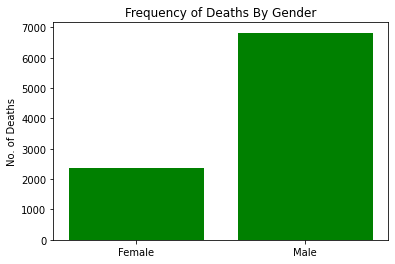

In [ ]:
plt.bar(gender_df['Sex'],gender_df['Count'],color='green')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By Gender')
plt.show()

A drug-wise analysis of deaths for males and females. Pretty cool, huh?

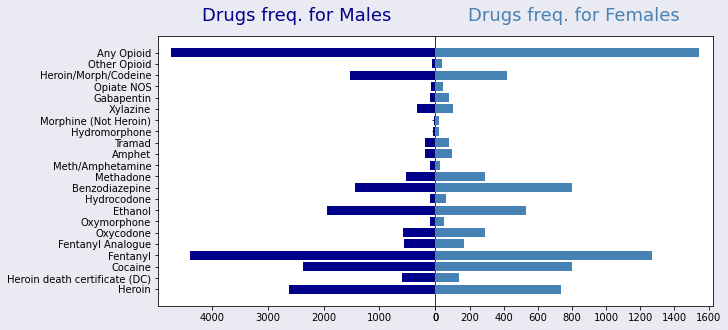

In [ ]:
df_female = df.loc[df['Sex']=='Female']
df_male = df.loc[df['Sex']=='Male']

drug_count_m = {}
drug_count_f = {}
for c in drugs:
    countm = df_male[c].loc[df_male[c]==1].count()
    drug_count_m[c]=countm
    countf = df_female[c].loc[df_female[c]==1].count()
    drug_count_f[c]=countf

counts_m = [i for i in drug_count_m.values()]
counts_f = [i for i in drug_count_f.values()]
drug = [i for i in drug_count_m]

fig, axes = plt.subplots(figsize=(10,5), facecolor='#eaeaf2', ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(drug, counts_m, align='center', color='#00008b', zorder=10)
axes[0].set_title('Drugs freq. for Males', fontsize=18, pad=15, color='#00008b')
axes[1].barh(drug, counts_f, align='center', color='#4682b4', zorder=10)
axes[1].set_title('Drugs freq. for Females', fontsize=18, pad=15, color='#4682b4')
axes[0].invert_xaxis()
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

plt.show()

We group the number of deaths by AGE

In [ ]:
age_df = df.groupby('Age').size().reset_index(name='Count')
age_df

,Age,Count
0,14.0,2
1,15.0,2
2,16.0,3
3,17.0,13
4,18.0,18
...,...,...
63,78.0,1
64,80.0,1
65,81.0,2
66,84.0,1


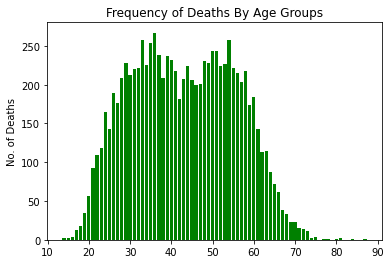

In [ ]:
plt.bar(age_df['Age'],age_df['Count'],color='green')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By Age Groups')
plt.show()

We group the number of deaths by PLACE OF DEATH

In [ ]:
loc_df = df.groupby('Location').size().reset_index(name='Death Count')
loc_df

,Location,Death Count
0,Assisted Living,2
1,Convalescent Home,3
2,Decedent's Home,52
3,Hospice,3
4,Hospital,2336
5,Hospital - Dead On Arrival,41
6,Hospital - ER/Outpatient,215
7,Hospital - Inpatient,129
8,Nursing Home,6
9,Other,1559


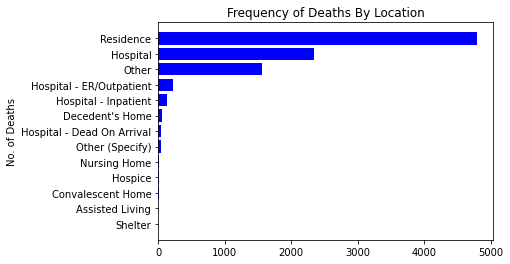

In [ ]:
loc_df = loc_df.sort_values(by=['Death Count'], ascending=True)

plt.barh(loc_df['Location'],loc_df['Death Count'],color='blue')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By Location')
plt.show()

Extracting a list of causes of death in the city, and then counting it for every city.

In [ ]:
my_list = list(df)

In [ ]:
city_drug = [my_list[6]] + my_list[22:44]
city_drug

['Residence City',
 'Heroin',
 'Heroin death certificate (DC)',
 'Cocaine',
 'Fentanyl',
 'Fentanyl Analogue',
 'Oxycodone',
 'Oxymorphone',
 'Ethanol',
 'Hydrocodone',
 'Benzodiazepine',
 'Methadone',
 'Meth/Amphetamine',
 'Amphet',
 'Tramad',
 'Hydromorphone',
 'Morphine (Not Heroin)',
 'Xylazine',
 'Gabapentin',
 'Opiate NOS',
 'Heroin/Morph/Codeine',
 'Other Opioid',
 'Any Opioid']

In [ ]:
city_drug_df = df.groupby('Residence City').size().reset_index(name='Count')
city_drug_df = city_drug_df.sort_values(by=['Count'],ascending=True)

In [ ]:
city_drug_df

,Residence City,Count
0,AGAWAM,1
261,NISKAYUNA,1
258,NEWPORT,1
256,NEWFIELD,1
253,NEW ROCHELLE,1
...,...,...
244,NEW BRITAIN,320
40,BRIDGEPORT,457
249,NEW HAVEN,493
432,WATERBURY,541


We now check frequency of deaths by City

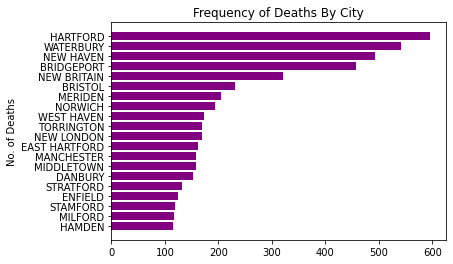

In [ ]:
plt.barh(city_drug_df['Residence City'].iloc[465:485],city_drug_df['Count'].iloc[465:485],color='purple')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By City')
plt.show()

Through the sklearn encoder, we convert all our values into numeric or ordinal values

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_new = df.copy()
labels = LabelEncoder()
col_list = list(df)
for col in col_list:
    try:
        df_new[col] = labels.fit_transform(df_new[col])
    except TypeError:
        df_new[col]=df_new[col].astype('string')

df_new.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,90,0,23,1,3,5,381,38,32,221,...,0,0,0,0,0,0,145,4,5,100
1,109,0,23,1,12,5,278,81,32,160,...,0,0,0,0,0,0,145,108,89,86
2,563,0,14,1,12,5,163,135,32,100,...,0,0,0,0,0,0,145,161,130,119
3,789,0,12,0,12,5,15,135,32,286,...,0,0,0,0,0,0,145,148,104,115
4,1100,0,27,1,12,5,359,38,3,206,...,0,0,0,0,0,1,145,43,35,11


Correlation between columns is found and plotted

In [ ]:
correlation = df_new.corr()


<Axes: >

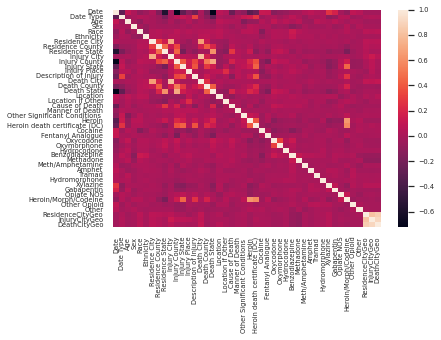

In [ ]:
sns.set(font_scale=0.6)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

We perform further groupings and exploratory data analysis on deaths in each county and by race and ethnicity.

<Axes: xlabel='Death County'>

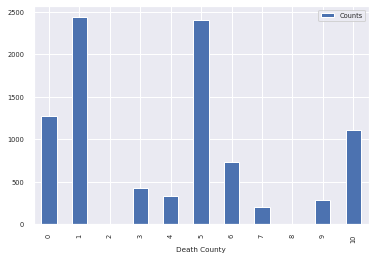

In [ ]:
value_counts = df_new.groupby('Death County').size().reset_index(name='Counts')
value_counts
value_counts.plot.bar(x = 'Death County', y = 'Counts')

<Axes: xlabel='Sex'>

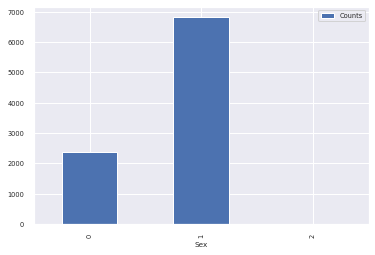

In [ ]:
value_counts = df_new.groupby('Sex').size().reset_index(name='Counts')
value_counts
value_counts.plot.bar(x = 'Sex', y = 'Counts')

<Axes: xlabel='Ethnicity'>

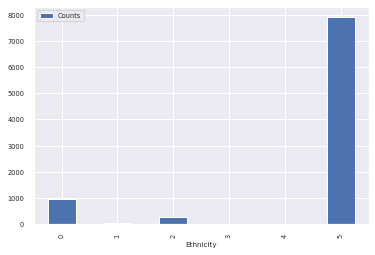

In [ ]:
value_counts = df_new.groupby('Ethnicity').size().reset_index(name='Counts')
value_counts
value_counts.plot.bar(x = 'Ethnicity', y = 'Counts')

<Axes: xlabel='Race'>

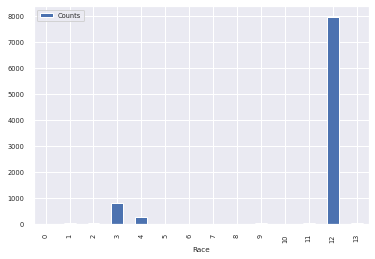

In [ ]:
value_counts = df_new.groupby('Race').size().reset_index(name='Counts')
value_counts
value_counts.plot.bar(x = 'Race', y = 'Counts')

We now print data points on an Interactive Plotly Map

In [ ]:
import re
df['DeathCityGeo'] = df['DeathCityGeo'].fillna(df['DeathCityGeo'].mode()[0])
print(type(df["DeathCityGeo"]))
res = []
for x in df["DeathCityGeo"].iteritems():
  res.append(re.findall(r'\(.*?\)', x[1]))
  # print(type(x[1]))

<class 'pandas.core.series.Series'>


In [ ]:
# print(res)
latlon = []

for text in res:
  tmp1, tmp2 = text[0].strip('()').split(',')
  latlon.append([float(tmp1),float(tmp2)])

In [ ]:
import plotly.express as px
geodf = pd.DataFrame()
geodf['latlon'] = latlon

cities = geodf["latlon"].value_counts()


# causes = df["Cause of Death"].value_counts()
count = 0
pltCi = []
pltNu = []
for indx in cities.iteritems():
  pltCi.append(indx[0])
  pltNu.append(indx[1])


fgeodf = pd.DataFrame()
fgeodf[['Latitude', 'Longitude']] = pd.DataFrame(pltCi)

fgeodf['Deaths'] = pltNu
print(fgeodf.shape)
fgeodf.head()



# Plot the data on a map using Plotly Express
geodf.head()
fig = px.scatter_mapbox(fgeodf,
                        lat="Latitude",
                        lon="Longitude",

                        hover_data=["Deaths"],
                        color_discrete_sequence=["fuchsia"],
                        zoom=3,
                        color="Deaths",
                        height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(229, 3)


# **Work Process:**

The data was extracted from a CSV file using the Pandas library and subsequently converted into a DataFrame. To better understand how to handle null values, we printed the type and number of all unique values as well as the number of null values for each column. Unnecessary columns were then dropped and summary statistics for the remaining columns were generated.

Further analysis involved grouping the number of deaths by gender, age, and place of death. The data was then encoded using Scikit-learn’s Label Encoder and a correlation heatmap was plotted. Additional exploratory data analysis was performed on deaths in each county as well as by race and ethnicity.

Finally, we visualized our findings using Plotly Express to plot the data points.


# Key Takeways:

1) 75% of those deceased are male as shown by this [graph](#scrollTo=8cb2cd52&line=3&uniqifier=1).

2) Benzodiazepine, Ethanol, Fentanyl and Opiods are the [biggest causes of death.](#scrollTo=hqBJdtUsAIOA)

3) Most deaths take place within the [age group of 18-24.](#scrollTo=8d1fb59f&line=2&uniqifier=1)

4) [Most deaths are reported at home](#scrollTo=44e6b5d1&line=4&uniqifier=1), followed by hospitals, followed by 'other' places.

5) Hartford, Waterbury, and New Haven are the most [affected cities](#scrollTo=d18c316c&line=3&uniqifier=1) by drug use, in terms of deaths

6) [Ethnicity-wise](#scrollTo=67582cf6&line=2&uniqifier=1) the most vulnerable group is hispanics

7) [Race-wise](#scrollTo=a0f99287&line=2&uniqifier=1) the most vulnerable group is white